In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import torch
import matplotlib.pyplot as plt
from torch import nn

In [3]:
iris = load_iris()

X = iris.data
y = iris.target

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [5]:
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)
X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test)

In [6]:
class Rnn(nn.Module):
    def __init__(self ,input_size, hidden_size, output_size):
        super(Rnn,self).__init__()
        
        self.hidden_size = hidden_size
        self.layer1 = nn.Linear(5,4)
        self.layer2 = nn.Linear(5,3)
        
    def forward(self,x,state_t):

        comb = torch.cat((x.reshape(1,1),state_t),1)
        
        hidden_state =self.layer1(comb)
        
        output =  torch.sigmoid(self.layer2(comb))
        return output,hidden_state
    
    def init_state_t(self):
        return nn.init.kaiming_uniform_(torch.empty(1, self.hidden_size))
        #return torch.zeros(1, self.hidden_size)
        
        

In [7]:
model = Rnn(1,4,3)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [8]:
output = model(torch.tensor([X_train[0][0]]).float() ,torch.rand(1,4))

In [9]:
output

(tensor([[0.0338, 0.9498, 0.2786]], grad_fn=<SigmoidBackward>),
 tensor([[ 0.2384, -2.0223,  2.8070,  2.5372]], grad_fn=<AddmmBackward>))

In [10]:
# training

loss_ = []

for i in range(10): #epoch
    
    for j in range(len(y_train)):
        
        X = X_train[j]
        y = y_train[j].reshape(1)
        
        hidden_state = model.init_state_t()
        
        for s in X: 
            output,hidden_state = model(torch.tensor([s]).float(),hidden_state)
            
        loss = criterion(output,y)
        
        if j%10 == 0:
            print(loss)
            loss_.append(loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 1)
        optimizer.step()
        
        
        

tensor(1.0597, grad_fn=<NllLossBackward>)
tensor(0.8910, grad_fn=<NllLossBackward>)
tensor(1.0489, grad_fn=<NllLossBackward>)
tensor(0.8817, grad_fn=<NllLossBackward>)
tensor(0.9022, grad_fn=<NllLossBackward>)
tensor(1.2153, grad_fn=<NllLossBackward>)
tensor(0.9204, grad_fn=<NllLossBackward>)
tensor(1.0697, grad_fn=<NllLossBackward>)
tensor(1.1658, grad_fn=<NllLossBackward>)
tensor(1.0341, grad_fn=<NllLossBackward>)
tensor(1.0141, grad_fn=<NllLossBackward>)
tensor(1.0205, grad_fn=<NllLossBackward>)
tensor(1.0031, grad_fn=<NllLossBackward>)
tensor(0.9213, grad_fn=<NllLossBackward>)
tensor(1.0008, grad_fn=<NllLossBackward>)
tensor(0.9067, grad_fn=<NllLossBackward>)
tensor(0.9312, grad_fn=<NllLossBackward>)
tensor(1.1232, grad_fn=<NllLossBackward>)
tensor(0.9476, grad_fn=<NllLossBackward>)
tensor(1.0268, grad_fn=<NllLossBackward>)
tensor(1.0835, grad_fn=<NllLossBackward>)
tensor(0.9729, grad_fn=<NllLossBackward>)
tensor(0.9790, grad_fn=<NllLossBackward>)
tensor(0.9811, grad_fn=<NllLossBac

In [11]:
%matplotlib inline

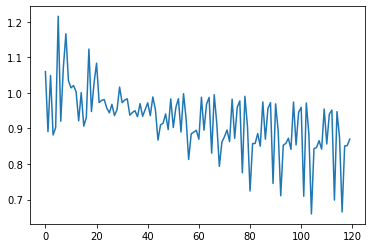

In [12]:
plt.plot(loss_)